In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "../output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

611


In [3]:
#  Perform API Calls

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
# Base URL to work off     
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | hilo.
Processing Record 1  of Set 1 | bluff.
Processing Record 2  of Set 1 | nizhneyansk.
City not found...skipping nizhneyansk.
Processing Record 3  of Set 1 | araouane.
Processing Record 4  of Set 1 | sitka.
Processing Record 5  of Set 1 | sinnamary.
Processing Record 6  of Set 1 | archidona.
Processing Record 7  of Set 1 | anloga.
Processing Record 8  of Set 1 | albany.
Processing Record 9  of Set 1 | avarua.
Processing Record 10  of Set 1 | strezhevoy.
Processing Record 11  of Set 1 | quelimane.
Processing Record 12  of Set 1 | salalah.
Processing Record 13  of Set 1 | jahrom.
City not found...skipping jahrom.
Processing Record 14  of Set 1 | charlestown.
Processing Record 15  of Set 1 | kahului.
Processing Record 16  of Set 1 | lagoa.
Processing Record 17  of Set 1 | vaini.
Processing Record 18  of Set 1 | mataura.
Processing Record 19  of Set 1 | belushya guba.
City not found...skipping belushy

Processing Record 24  of Set 4 | benguela.
Processing Record 25  of Set 4 | katsuura.
Processing Record 26  of Set 4 | bethel.
Processing Record 27  of Set 4 | arona.
Processing Record 28  of Set 4 | green river.
Processing Record 29  of Set 4 | wahran.
City not found...skipping wahran.
Processing Record 30  of Set 4 | buraydah.
Processing Record 31  of Set 4 | teguise.
Processing Record 32  of Set 4 | klaksvik.
Processing Record 33  of Set 4 | kavieng.
Processing Record 34  of Set 4 | coihaique.
Processing Record 35  of Set 4 | chuy.
Processing Record 36  of Set 4 | grand gaube.
Processing Record 37  of Set 4 | samusu.
City not found...skipping samusu.
Processing Record 38  of Set 4 | maltahohe.
Processing Record 39  of Set 4 | svetlogorsk.
Processing Record 40  of Set 4 | saint-joseph.
Processing Record 41  of Set 4 | umzimvubu.
City not found...skipping umzimvubu.
Processing Record 42  of Set 4 | luhyny.
Processing Record 43  of Set 4 | litovko.
Processing Record 44  of Set 4 | sain

Processing Record 5  of Set 8 | ahuimanu.
Processing Record 6  of Set 8 | carutapera.
Processing Record 7  of Set 8 | mandera.
Processing Record 8  of Set 8 | colac.
Processing Record 9  of Set 8 | teya.
Processing Record 10  of Set 8 | baicheng.
Processing Record 11  of Set 8 | kendari.
Processing Record 12  of Set 8 | faanui.
Processing Record 13  of Set 8 | asosa.
Processing Record 14  of Set 8 | oum hadjer.
Processing Record 15  of Set 8 | babanusah.
City not found...skipping babanusah.
Processing Record 16  of Set 8 | bundaberg.
Processing Record 17  of Set 8 | sydney mines.
Processing Record 18  of Set 8 | kaoma.
Processing Record 19  of Set 8 | guliston.
Processing Record 20  of Set 8 | jamalpur.
Processing Record 21  of Set 8 | clyde river.
Processing Record 22  of Set 8 | vallenar.
Processing Record 23  of Set 8 | balabac.
Processing Record 24  of Set 8 | canavieiras.
Processing Record 25  of Set 8 | navahrudak.
Processing Record 26  of Set 8 | ozu.
Processing Record 27  of Se

Processing Record 34  of Set 11 | matinha.
Processing Record 35  of Set 11 | vardo.
Processing Record 36  of Set 11 | doctor pedro p. pena.
City not found...skipping doctor pedro p. pena.
Processing Record 37  of Set 11 | natal.
Processing Record 38  of Set 11 | kloulklubed.
Processing Record 39  of Set 11 | alindao.
Processing Record 40  of Set 11 | port elgin.
Processing Record 41  of Set 11 | altay.
Processing Record 42  of Set 11 | comodoro rivadavia.
Processing Record 43  of Set 11 | kadykchan.
City not found...skipping kadykchan.
Processing Record 44  of Set 11 | formosa.
Processing Record 45  of Set 11 | hudson bay.
Processing Record 46  of Set 11 | san quintin.
Processing Record 47  of Set 11 | mabaruma.
Processing Record 48  of Set 11 | iralaya.
Processing Record 49  of Set 11 | caala.
Processing Record 0  of Set 12 | oudtshoorn.
Processing Record 1  of Set 12 | santa marinella.
Processing Record 2  of Set 12 | vila franca do campo.
Processing Record 3  of Set 12 | grand river

In [5]:
#  Convert Raw Data to DataFrame
# Data Count
weather_df.count()

City                611
Country             611
Date                611
Latitude            611
Longitude           611
Cloudiness (%)      611
Humidity (%)        611
Max Temp (F)        611
Wind Speed (mph)    611
dtype: int64

In [6]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,hilo,US,2020-11-01 16:32:54,19.73,-155.09,1,55,86.27,4.6
1,bluff,NZ,2020-11-01 16:32:54,-46.6,168.33,53,67,55.274,5.36
2,nizhneyansk,,,,,,,,
3,araouane,ML,2020-11-01 16:32:55,18.9,-3.53,87,15,82.994,2.89
4,sitka,US,2020-11-01 16:32:55,57.05,-135.33,90,87,48.47,10.8


In [7]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

In [8]:
# Export the city data into a .csv.
# Display the DataFrame

# city_data_pd.to_csv("cities.csv", encoding="utf-8", index=False)
# city_data_pd.round()
# city_data_pd.head()

In [9]:
# Inspect the data and remove the cities where the humidity > 100%.

# ha! found one!!!

# Skip this step if there are no cities that have humidity > 100%.

The plot proves that as temperature drops as you move away from the equator


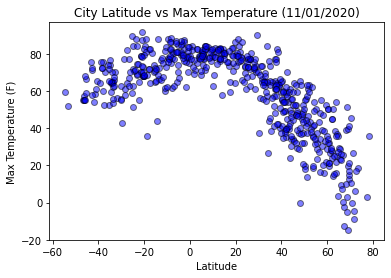

In [10]:
#  Plotting the Data

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as temperature drops as you move away from the equator")

The plot shows that there is no real pattern describing the relationship between latitude and humidity


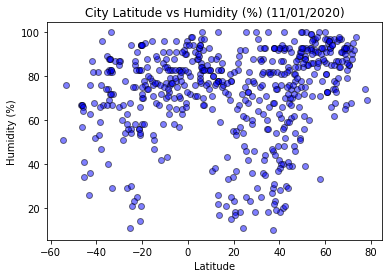

In [11]:
#  Latitude vs. Humidity Plot
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real pattern describing the relationship between latitude and humidity")

The plot shows that the relationship between Cloudiness and Latitude is all over the place and no real pattern can be discerned


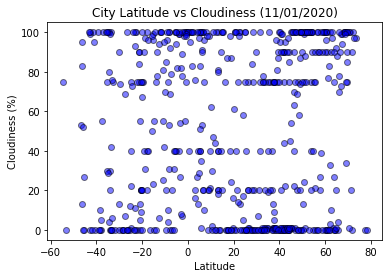

In [12]:
#  Latitude vs. Cloudiness Plot

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that the relationship between Cloudiness and Latitude is all over the place and no real pattern can be discerned")

The plot shows that the relationship between Wind Speed and Latitude is all over the place and no real pattern can be discerned


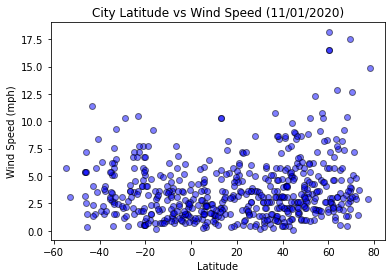

In [13]:
# Latitude vs. Wind Speed Plot


today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that the relationship between Wind Speed and Latitude is all over the place and no real pattern can be discerned")

In [14]:
#  Linear Regression

In [15]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

Regression line equation is: y = -0.99x + 91.47
The r-value is: -0.852235711284127
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


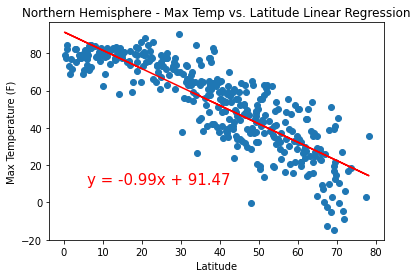

In [39]:
#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

In [40]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.852235711284127


Regression line equation is: y = 0.42x + 80.1
The r-value is: 0.542933582030087
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


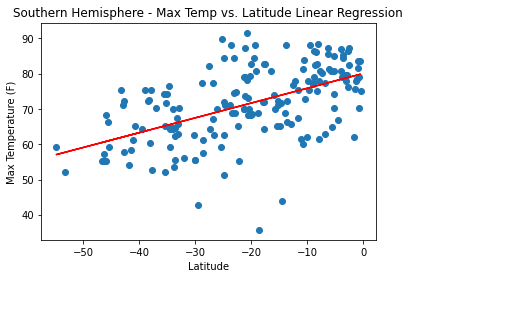

In [41]:
#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

In [42]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.542933582030087


Regression line equation is: y = 0.22x + 65.13
The r-value is: 0.19821456905658166
The regression does not display much of a correlation between the data sets.


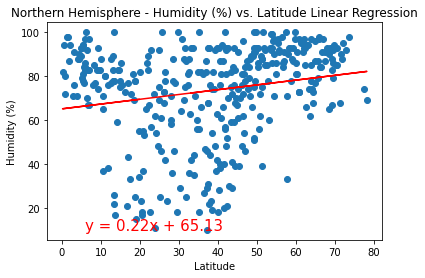

In [43]:
#  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

In [44]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.19821456905658166


Regression line equation is: y = 0.35x + 78.42
The r-value is: 0.2629530389377316
The regression does not display much of a correlation between the data sets.


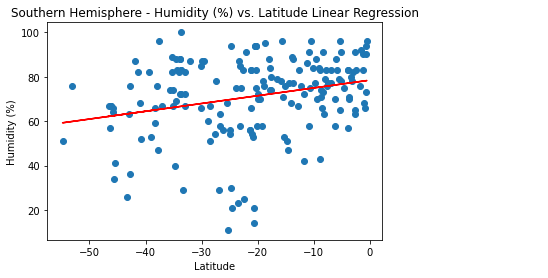

In [45]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

In [46]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.2629530389377316


Regression line equation is: y = 0.21x + 42.25
The r-value is: 0.10009913648965342
The regression does not display much of a correlation between the data sets.


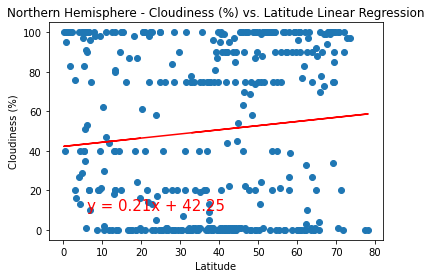

In [47]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

In [48]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.10009913648965342


Regression line equation is: y = 0.7x + 67.88
The r-value is: 0.23598376154326434
The regression does not display much of a correlation between the data sets.


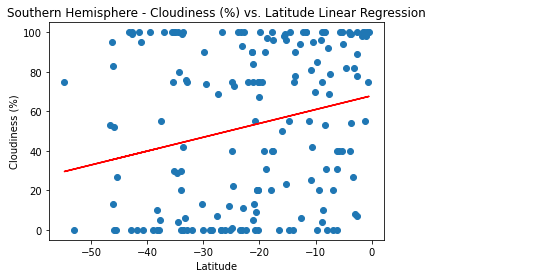

In [49]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

In [50]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.23598376154326434


Regression line equation is: y = 0.04x + 2.3
The r-value is: 0.2689559148410364
The regression does not display much of a correlation between the data sets.


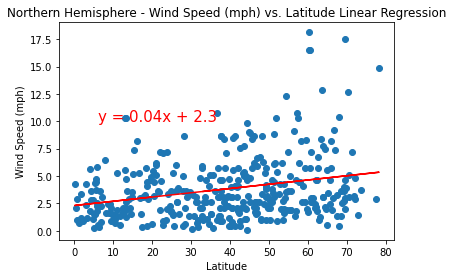

In [51]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

In [52]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.2689559148410364


Regression line equation is: y = -0.04x + 2.49
The r-value is: -0.2510469042848089
The regression does not display much of a correlation between the data sets.


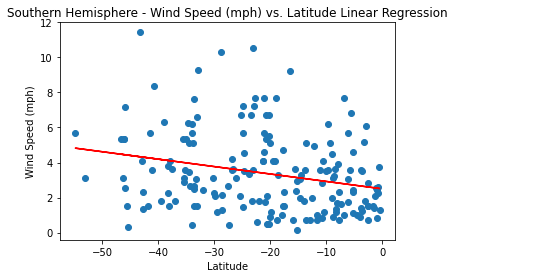

In [53]:
#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

In [54]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.2510469042848089
